# Entrenamiento CNN


# Importando dataset


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.applications.mobilenet import preprocess_input
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.preprocessing import image
from mlxtend.evaluate import confusion_matrix
import matplotlib.image as mpimg

2022-11-18 11:37:20.076958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 11:37:20.567185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-18 11:37:20.567236: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-18 11:37:20.624597: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 11:37:21.591115: W tensorflow/stream_executor/platform/de

In [2]:
#Limpiamos todo en caso de un nuevo entrenamiento
K.clear_session()
# Damos las direcciones de las carpetas que contienen los datasets
data_entrenamiento = '../dataset_reducida/train'
data_validacion = '../dataset_reducida/validation'

In [3]:
#Hyper parametros
epocas = 21 #cantidad de iteraciones
longitud, altura = 200, 200 #longitud y altura de la convolucion
batch_size = 32 #numero de imagenes que procesa la pc en cada uno de los pasos
#pasos_entramiento = cada epoca se va a dividir en XX pasos
#pasos_validacion = cada epoca se va a validar YY, sirve para verificar que se esta aprendiendo
filtrosConv1 = 128 #numero de filtros que aplicaremos tras la primera convolucion
filtrosConv2 = 256 #tras segunda segunda convolucion
tam_filtro1 = (3,3)
tam_filtro2 = (2,2)
tam_pool = (2,2) #para mejorar avance de la convolucion
clases = 3
lr = 0.0005

#Cambios en numero de filtros, con un aumento considerable

In [4]:
entrenamiento_datagen = ImageDataGenerator(
    rescale = 1. / 255, #reescalamos los pixeles de la imagen entre 0 y 1, 
    shear_range = 0.27, #inclinar imagenes, porque las imagenes no siempre vienen derechas,
    zoom_range = 0.36, #porciones de imagenes,
    horizontal_flip = True)
# CAMBIO en shear_range y zoom_range a 0,27 y 0,36 desde 0,3

validacion_datagen = ImageDataGenerator(rescale = 1. / 255)

#va abrir y preparar toda la carpeta de entrenamiento
imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

#va abrir y preparar toda la carpeta de validacion
imagen_validacion = validacion_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

print(imagen_entrenamiento.class_indices)

Found 1847 images belonging to 3 classes.
Found 452 images belonging to 3 classes.
{'high': 0, 'low': 1, 'mid': 2}


In [5]:
pasos_entrenamiento = imagen_entrenamiento.n//imagen_entrenamiento.batch_size
pasos_validacion = imagen_validacion.n//imagen_validacion.batch_size

In [6]:
#Crear la red neuronal convolucional
cnn = Sequential() #varias capas aplicadas entre ellas
cnn.add(Conv2D(filtrosConv1, tam_filtro1, padding = 'same', input_shape=(longitud,altura,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size = tam_pool))
cnn.add(Dropout(0.79123456)) #se apagan 80% de as neuronas cada paso, evitando sobreajuste

cnn.add(Conv2D(filtrosConv2, tam_filtro2, padding = 'same'))
cnn.add(MaxPooling2D(pool_size = tam_pool))

cnn.add(Flatten()) #imagen profunda la vamos a hacer plana, es decir, solo una dimension
cnn.add(Dense(2048, activation = 'relu')) #añadimos una capa que va a conectar la anterior y las sgts 256 conexiones
cnn.add(Dropout(0.5123456)) #apagamos 50% de as neuronas cada paso, evitando sobreajuste
cnn.add(Dense(clases,activation = 'softmax')) #indica que prob tiene cada clase

# se agrega un dropout al inicio del modelo con 80% de perdida, por otro lado la densida de la capa se cambia a 2048

2022-11-18 11:37:23.276122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-18 11:37:23.276441: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-18 11:37:23.276457: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cipher): /proc/driver/nvidia/version does not exist
2022-11-18 11:37:23.277081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 11:37:23.375319: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5242880000 exceeds 1

In [7]:
# import scipy
cnn.compile(loss='categorical_crossentropy',
           optimizer=optimizers.Adam(lr=lr),
           metrics=['accuracy'])
H = cnn.fit_generator(
    imagen_entrenamiento,
    steps_per_epoch=pasos_entrenamiento,
    epochs = epocas,
    validation_data = imagen_validacion,
    validation_steps= pasos_validacion)
cnn.save('model_11v7.h5')

/home/ccipher/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/tmp/ipykernel_46373/2778928771.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = cnn.fit_generator(


Epoch 1/21


2022-11-18 11:37:27.743890: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5242880000 exceeds 10% of free system memory.
2022-11-18 11:37:28.248449: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5242880000 exceeds 10% of free system memory.


57/57 [==============================] - 597s 10s/step - loss: 24.1879 - accuracy: 0.4116 - val_loss: 63.8771 - val_accuracy: 0.2723
Epoch 2/21
57/57 [==============================] - 606s 11s/step - loss: 1.2329 - accuracy: 0.4871 - val_loss: 57.4543 - val_accuracy: 0.2522
Epoch 3/21
57/57 [==============================] - 596s 10s/step - loss: 1.0993 - accuracy: 0.5207 - val_loss: 55.4734 - val_accuracy: 0.3661
Epoch 4/21
57/57 [==============================] - 596s 10s/step - loss: 0.9595 - accuracy: 0.5482 - val_loss: 47.7733 - val_accuracy: 0.3192
Epoch 5/21
57/57 [==============================] - 597s 10s/step - loss: 0.9364 - accuracy: 0.5669 - val_loss: 44.1216 - val_accuracy: 0.2723
Epoch 6/21
57/57 [==============================] - 600s 11s/step - loss: 0.9261 - accuracy: 0.5758 - val_loss: 31.6442 - val_accuracy: 0.2790
Epoch 7/21
57/57 [==============================] - 603s 11s/step - loss: 0.8651 - accuracy: 0.5934 - val_loss: 30.3631 - val_accuracy: 0.2835
Epoch 8/2

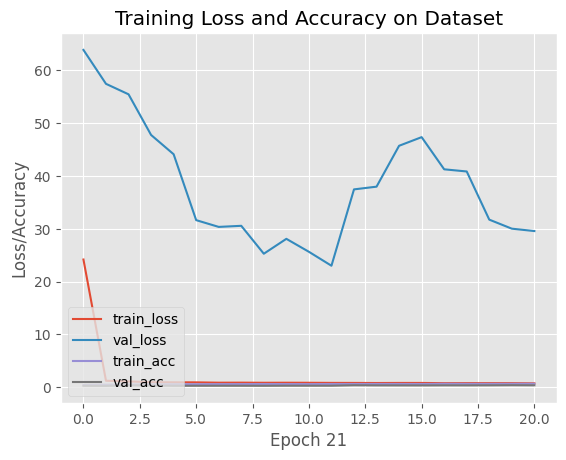

In [8]:
N = epocas

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,N),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,N),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,N),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,N),H.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch "+str(N))
plt.ylabel("Loss/Accuracy")     
plt.legend(loc="lower left")
plt.savefig("plot11v7.png")
